In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from skimage.measure import block_reduce

In [2]:
%matplotlib inline

# Standard deviation

The standard deviation of a sample, $\sigma_{N-1}$, gives a degree of the precision of the measurements. 

Two-thirds of measurements will lie within $\sigma_{N-1}$ of the mean. 


# Standard error

The uncertainty in the location of the center of a distribution is givin by the stadard error of the mean, $\alpha$.

$\alpha$ is defined as: 

$$\frac{\sigma_{N-1}}{\sqrt{n}}$$

where $\sigma_{N-1}$ is the standard deviation of the sample. 

The result of repeat measurements is reported as $\bar{x} \pm \alpha$ or:


$$\bar{x} \pm \frac{\sigma_{N-1}}{\sqrt{n}}$$





# Simulate data

Here, we simulate experimental data for 10,000 measurements of CD diameters with normally distributed random noise

In [3]:
# set random number generator with defined seed value
np.random.seed(351351435)

# define mean and standard deviation of distribution
mu, sigma, n = 10, 1, 2500

# generate pseudo-random, normally distributed sample data
x = np.random.normal(loc = mu, scale = sigma, size = n)
sem = stats.sem(x)
print(f'mu: {mu: .2f} \n' + f'sigma: {sigma: .2f} \n' + f'standard error of the mean (SEM): {sem: .2f} \n' + f'x: {x}')

mu:  10.00 
sigma:  1.00 
standard error of the mean (SEM):  0.02 
x: [10.03052994 10.30393535 11.16322666 ... 10.24218669 11.17534273
 11.02277398]


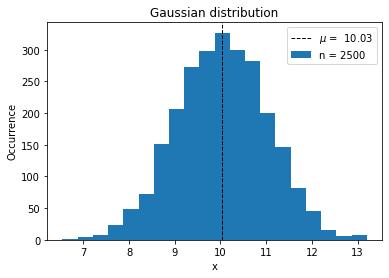

In [4]:
mean = x.mean()
stdv = x.std(ddof=1)
bins = 20

# plot histogram
plt.hist(x, bins, label=f'n = {n}') 
# plot vertical line at the mean
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1, label = f'$\mu$ = {mean: .2f}') 
# add labels 
plt.title(f'Gaussian distribution')
plt.xlabel('x')
plt.ylabel('Occurrence')
plt.legend();

In [5]:
# create 1D 'time' array with n elements
time = np.linspace(0, n, n)
time.shape

(2500,)

In [6]:
# downsample x array where the mean is taken for every 5, 10, and 50 elements
x5 = block_reduce(x, block_size=(5,), func=np.mean)
x10 = block_reduce(x, block_size=(10,), func=np.mean)
x50 = block_reduce(x, block_size=(50,), func=np.mean)

x_list = [x5, x10, x50, x]

In [11]:
# downsample time array by slicing i.e. keeping (and not averaging) 
# every 5, 10, and 50 elements 
t5 = time[1::5]
t10 = time[1::10]
t50 = time[1::50]

t5.shape, t10.shape, t50.shape, time.shape

((500,), (250,), (50,), (2500,))

In [12]:
n_list = [5, 10, 50, len(x)]
n_list

[5, 10, 50, 2500]

In [13]:
stdv_list = []
alpha_list = []

for l, n in zip(x_list, n_list):
  stdv = np.std(l, ddof=1)
  alpha = np.std(x, ddof=1) / np.sqrt(n)
  stdv_list.append(stdv)
  alpha_list.append(alpha)

stdv_list, alpha_list

([0.45203266737109005,
  0.33147261926695143,
  0.13606372635511155,
  0.9941857347605976],
 [0.44461337703705434,
  0.31438913390915235,
  0.14059909496162976,
  0.01988371469521195])

# Concequences of averaging over statistical fluctuations 

It is important to understand that by averaging we reduce the noise in the data.
In other words, the spread decreases as the size of the sample used to calculate the mean ($N_{\mu}$) inreases.

The standard deviation of the histogram of means is the standard error of the mean, $\alpha$ - as expected we get good agreement of calcuated $\sigma_{N-1}$ and $\alpha$!

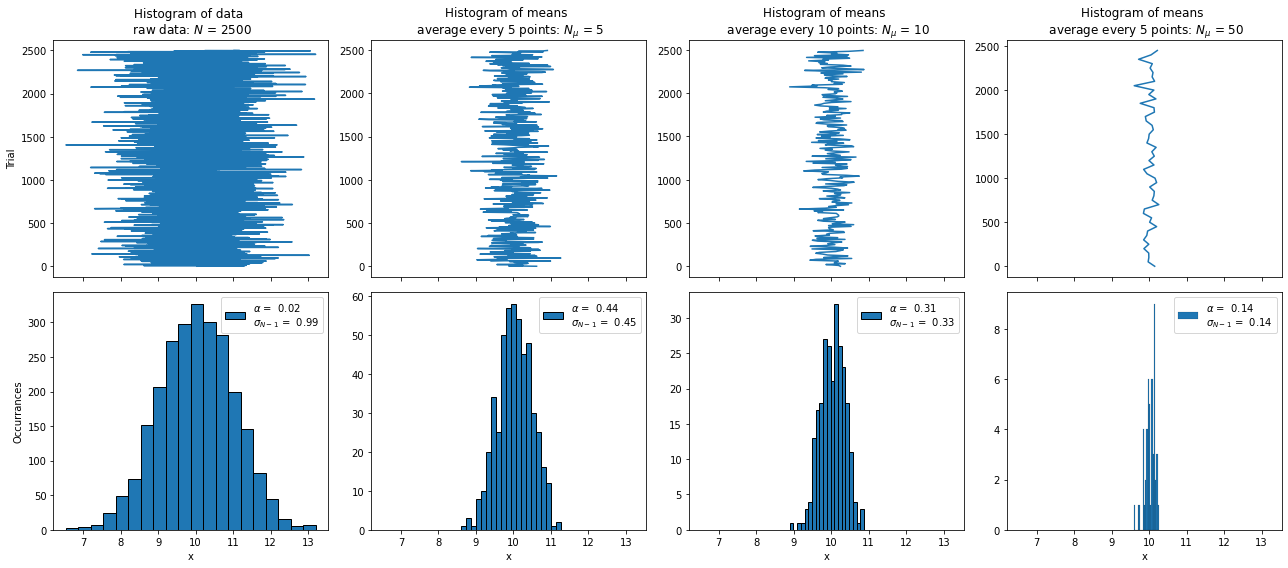

In [14]:
fig, ax = plt.subplots(2, 4, figsize = (18, 8), sharex=True)

ax[0,0].plot(x, time, linestyle='solid')
ax[0,0].set_ylabel('Trial')
ax[0,0].set_title(f'Histogram of data \n raw data: $N$ = {n_list[-1]}')

ax[1,0].hist(x, bins, edgecolor='k', label=r'$\alpha$' + f' = {alpha_list[-1]: .2f} \n' + r'$\sigma_{N-1}$' + f' = {stdv_list[-1]: .2f}')
ax[1,0].set_ylabel('Occurrances')
ax[1,0].set_xlabel('x')
ax[1,0].legend()

ax[0,1].plot(x5, t5, linestyle='solid')
ax[0,1].set_title('Histogram of means \n average every 5 points: $N_{\mu}$' + f' = {n_list[0]}')

ax[1,1].hist(x5, bins, edgecolor='k', label=r'$\alpha$' + f' = {alpha_list[0]: .2f} \n' + r'$\sigma_{N-1}$' + f' = {stdv_list[0]: .2f}')
ax[1,1].set_xlabel('x')
ax[1,1].legend()

ax[0,2].plot(x10, t10, linestyle='solid')
ax[0,2].set_title('Histogram of means \n average every 10 points: $N_{\mu}$' + f' = {n_list[1]}')

ax[1,2].hist(x10, bins, edgecolor='k', label=r'$\alpha$' + f' = {alpha_list[1]: .2f} \n' + r'$\sigma_{N-1}$' + f' = {stdv_list[1]: .2f}')
ax[1,2].set_xlabel('x')
ax[1,2].legend()

ax[0,3].plot(x50, t50, linestyle='solid')
ax[0,3].set_title('Histogram of means \n average every 5 points: $N_{\mu}$' + f' = {n_list[2]}')

ax[1,3].hist(x50, bins, edgecolor='k', linewidth=0.1, label=r'$\alpha$' + f' = {alpha_list[2]: .2f} \n' + r'$\sigma_{N-1}$' + f' = {stdv_list[2]: .2f}')
ax[1,3].set_xlabel('x')
ax[1,3].legend()
fig.tight_layout();


# The spread if the histogram of means decreases as $N_{\mu}$ increases

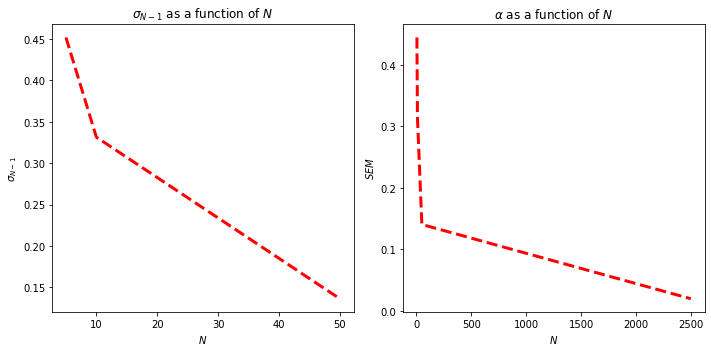

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(n_list[:-1], stdv_list[:-1], color='r', linestyle='--', linewidth=3)
ax[0].set_ylabel('$\sigma_{N-1}$')
ax[0].set_xlabel('$N$')
ax[0].set_title('$\sigma_{N-1}$ as a function of $N$')
ax[1].plot(n_list, alpha_list, color='r', linestyle='--', linewidth=3)
ax[1].set_ylabel('$SEM$')
ax[1].set_xlabel('$N$')
ax[1].set_title(r'$\alpha$ as a function of $N$')

fig.tight_layout();

In [ ]:
stop

NameError: ignored

In [ ]:
len_list = [len(l) for l in x_list]
len_list

[500, 250, 50, 2500]

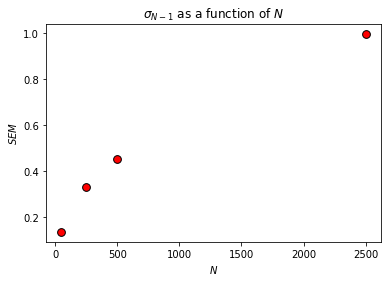

In [ ]:
plt.scatter(len_list, stdv_list, color='r', s=60, edgecolors='k')
plt.title(r'$\sigma_{N-1}$ as a function of $N$')
plt.ylabel('$SEM$')
plt.xlabel('$N$');

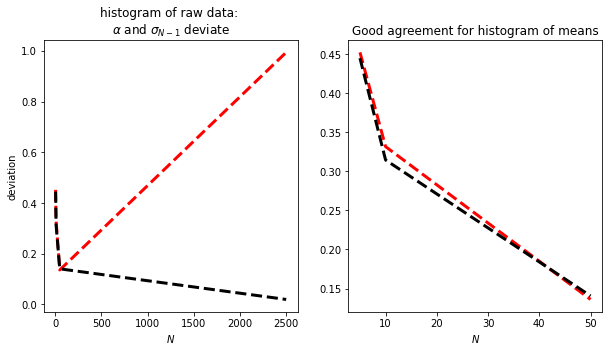

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(n_list, stdv_list, color='r', linestyle = 'dashed', linewidth=3, label = r'$\sigma_{N-1}$')
ax[0].plot(n_list, alpha_list, color='k', linestyle = 'dashed', linewidth=3, label = r'$\alpha$')
ax[0].set_ylabel('deviation')
ax[0].set_xlabel('$N$')
ax[0].set_title('histogram of raw data: \n' + r'$\alpha$ and $\sigma_{N-1}$ deviate')
ax[1].plot(n_list[:-1], stdv_list[:-1], color='r', linestyle = 'dashed', linewidth=3, label = r'$\sigma_{N-1}$')
ax[1].plot(n_list[:-1], alpha_list[:-1], color='k', linestyle = 'dashed', linewidth=3, label = r'$\alpha$')
ax[1].set_xlabel('$N$')
ax[1].set_title('Good agreement for histogram of means');


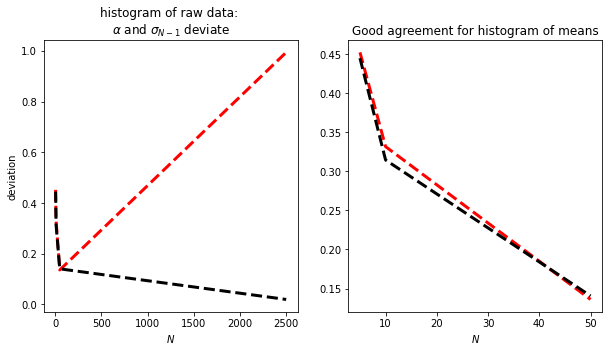

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(n_list, stdv_list, color='r', linestyle = 'dashed', linewidth=3, label = r'$\sigma_{N-1}$')
ax[0].plot(n_list, alpha_list, color='k', linestyle = 'dashed', linewidth=3, label = r'$\alpha$')
ax[0].set_ylabel('deviation')
ax[0].set_xlabel('$N$')
ax[0].set_title('histogram of raw data: \n' + r'$\alpha$ and $\sigma_{N-1}$ deviate')
ax[1].plot(n_list[:-1], stdv_list[:-1], color='r', linestyle = 'dashed', linewidth=3, label = r'$\sigma_{N-1}$')
ax[1].plot(n_list[:-1], alpha_list[:-1], color='k', linestyle = 'dashed', linewidth=3, label = r'$\alpha$')
ax[1].set_xlabel('$N$')
ax[1].set_title('Good agreement for histogram of means');


# The above graph looks very different if it is plotted on the same scale

This this case, we can clearly see that there is very good agreement in deviations when we compare histograms of the mean, while the raw data is much noisier. 

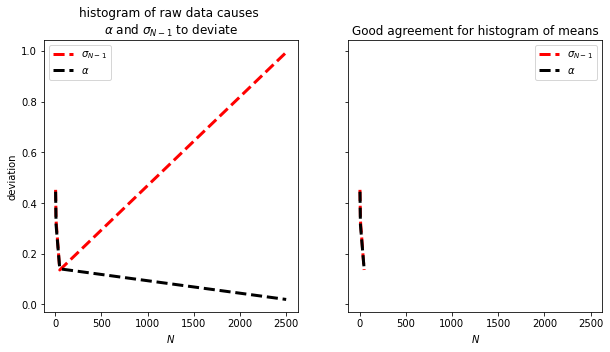

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey = True, sharex = True)

ax[0].plot(n_list, stdv_list, color='r', linestyle = 'dashed', linewidth=3, label = r'$\sigma_{N-1}$')
ax[0].plot(n_list, alpha_list, color='k', linestyle = 'dashed', linewidth=3, label = r'$\alpha$')
ax[0].set_ylabel('deviation')
ax[0].set_xlabel('$N$')
ax[0].set_title('histogram of raw data causes \n' + r'$\alpha$ and $\sigma_{N-1}$ to deviate')
ax[0].legend()
ax[1].plot(n_list[:-1], stdv_list[:-1], color='r', linestyle = 'dashed', linewidth=3, label = r'$\sigma_{N-1}$')
ax[1].plot(n_list[:-1], alpha_list[:-1], color='k', linestyle = 'dashed', linewidth=3, label = r'$\alpha$')
ax[1].set_xlabel('$N$')
ax[1].set_title('Good agreement for histogram of means')
ax[1].legend();
